In [1]:
import numpy as np
import time

In [2]:
EPSILON = 1e-8

class Model():
    def __init__(self, optimizer, x_init, y_init, learning_rate, global_min):
        self.x = x_init
        self.y = y_init
        self.lr = learning_rate
        self.global_min = global_min
        self.optimizer = optimizer
        
        if self.optimizer == "Momentum" or self.optimizer == "Nestrov momentum":
            self.beta = 0.9
            self.v_x = EPSILON
            self.v_y = EPSILON
        elif self.optimizer == "ADAgrad":
            self.r_x = 0.0
            self.r_y = 0.0
        elif self.optimizer == "RMSprop":
            self.r_x = 0.0
            self.r_y = 0.0
            self.rho = 0.99  # can be changed, 2nd param with lr
        elif self.optimizer == "Adam":
            self.rho1 = 0.9
            self.rho2 = 0.99
            self.t = 0
            self.s_x = 0
            self.s_y = 0
            self.r_x = 0
            self.r_y = 0
            
    def forward(self):
        if self.optimizer == "SGD":
            grad_x = self.x**3-8*self.x-3
            grad_y = self.y**3-8*self.y-3
            self.x -= self.lr * grad_x
            self.y -= self.lr * grad_y
        elif self.optimizer == "Momentum":
            grad_x = self.x**3-8*self.x-3
            grad_y = self.y**3-8*self.y-3
            self.v_x = self.lr*self.v_x-self.lr*grad_x
            self.v_y = self.lr*self.v_y-self.lr*grad_y
            self.x += self.v_x
            self.y += self.v_y
        elif self.optimizer == "Nestrov momentum":
            self.x += self.beta*self.v_x
            self.y += self.beta*self.v_y
            grad_x = self.x**3-8*self.x-3
            grad_y = self.y**3-8*self.y-3
            self.v_x = self.lr*self.v_x-self.lr*grad_x
            self.v_y = self.lr*self.v_y-self.lr*grad_y
            self.x += self.v_x
            self.y += self.v_y
        elif self.optimizer == "ADAgrad":
            grad_x = self.x**3-8*self.x-3
            grad_y = self.y**3-8*self.y-3
            self.r_x += np.multiply(grad_x, grad_x)
            self.r_y += np.multiply(grad_y, grad_y)
            self.x -= np.multiply(self.lr/(EPSILON+np.sqrt(self.r_x)), grad_x)
            self.y -= np.multiply(self.lr/(EPSILON+np.sqrt(self.r_y)), grad_y)  
        elif self.optimizer == "RMSprop":
            grad_x = self.x**3-8*self.x-3
            grad_y = self.y**3-8*self.y-3
            self.r_x = self.r_x*self.rho + (1-self.rho)*np.multiply(grad_x, grad_x)
            self.r_y = self.r_y*self.rho + (1-self.rho)*np.multiply(grad_y, grad_y)
            self.x -= np.multiply(self.lr/(EPSILON+np.sqrt(self.r_x)), grad_x)
            self.y -= np.multiply(self.lr/(EPSILON+np.sqrt(self.r_y)), grad_y)
        elif self.optimizer == "Adam":
            grad_x = self.x**3-8*self.x-3
            grad_y = self.y**3-8*self.y-3
            self.t += 1
            self.s_x = self.s_x*self.rho1+(1-self.rho1)*grad_x
            self.s_y= self.s_y*self.rho1+(1-self.rho1)*grad_y
            self.r_x = self.r_x*self.rho2 + (1-self.rho2)*np.multiply(grad_x, grad_x)
            self.r_y = self.r_y*self.rho2 + (1-self.rho2)*np.multiply(grad_y, grad_y)
            self.x -= self.lr*(self.s_x/(1-self.rho1**self.t))/(EPSILON+np.sqrt((self.r_x/(1-self.rho2**self.t))))
            self.y -= self.lr*(self.s_y/(1-self.rho1**self.t))/(EPSILON+np.sqrt((self.r_y/(1-self.rho2**self.t))))
            
    def loss(self):
        loss = np.mean((np.array(self.global_min)-np.array([self.x, self.y]))**2)
        if loss < 1000:
            return loss
        else:
            return -1

In [3]:
def findCost(x, y):
    return 0.25*x**4+0.25*y**4-4*x**2-4*y**2-3*x-3*y

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display

In [5]:
lr = 0.1
init = [4, 4]

xlist = np.linspace(0.0, 5.0, 100)
ylist = np.linspace(0.0, 5.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = findCost(X, Y)

Loss: 1.690152108437131e-06
Final result: x=3.0013000585019287, y=3.0013000585019287



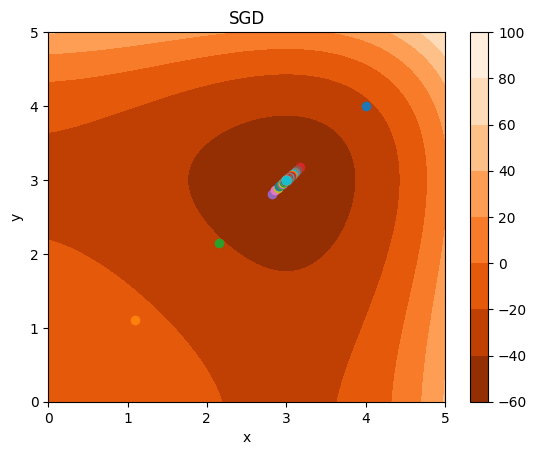

In [6]:
fig,ax=plt.subplots(1,1)
# getting the original colormap using cm.get_cmap() function
orig_map=plt.cm.get_cmap('Oranges')
# reversing the original colormap using reversed() function
reversed_map = orig_map.reversed()
cp = ax.contourf(X, Y, Z, cmap=reversed_map)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('SGD')
ax.set_xlabel('x')
ax.set_ylabel('y')

flag = False
model = Model("SGD", init[0], init[1], lr, np.array([3, 3]))
print("Initial conditions: x={}, y={}\nLearning rate = {}".format(init[0], init[1], lr))
pl.scatter(model.x,model.y)
display.display(pl.gcf())
display.clear_output(wait=True)
time.sleep(0.1)

for epoch in range(1,50):
    model.forward()

    if model.loss() == -1:
        print("Loss is too large, gradient diverges\n")
        flag = True
        break
    elif model.loss() < 300:
        #pl.clf()
        pl.scatter(model.x,model.y)
        display.display(pl.gcf())
        display.clear_output(wait=True)
        time.sleep(0.1)
if not flag:
    print("Loss: {}".format(model.loss()))
    print("Final result: x={}, y={}\n".format(model.x, model.y))

Loss: 4.297566491937265e-20
Final result: x=2.9999999997926943, y=2.9999999997926943



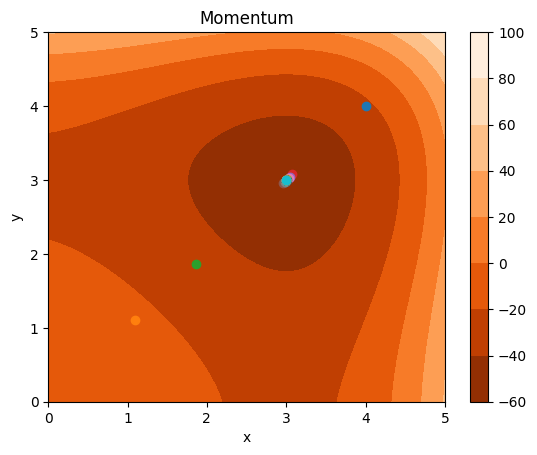

In [7]:
fig,ax=plt.subplots(1,1)
# getting the original colormap using cm.get_cmap() function
orig_map=plt.cm.get_cmap('Oranges')
# reversing the original colormap using reversed() function
reversed_map = orig_map.reversed()
cp = ax.contourf(X, Y, Z, cmap=reversed_map)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Momentum')
ax.set_xlabel('x')
ax.set_ylabel('y')

flag = False
model = Model("Momentum", init[0], init[1], lr, np.array([3, 3]))
print("Initial conditions: x={}, y={}\nLearning rate = {}".format(init[0], init[1], lr))
pl.scatter(model.x,model.y)
display.display(pl.gcf())
display.clear_output(wait=True)
time.sleep(0.1)

for epoch in range(1,50):
    model.forward()

    if model.loss() == -1:
        print("Loss is too large, gradient diverges\n")
        flag = True
        break
    elif model.loss() < 300:
        #pl.clf()
        pl.scatter(model.x,model.y)
        display.display(pl.gcf())
        display.clear_output(wait=True)
        time.sleep(0.1)
if not flag:
    print("Loss: {}".format(model.loss()))
    print("Final result: x={}, y={}\n".format(model.x, model.y))

Loss: 30.968654374687723
Final result: x=-2.5649487306432324, y=-2.5649487306432324



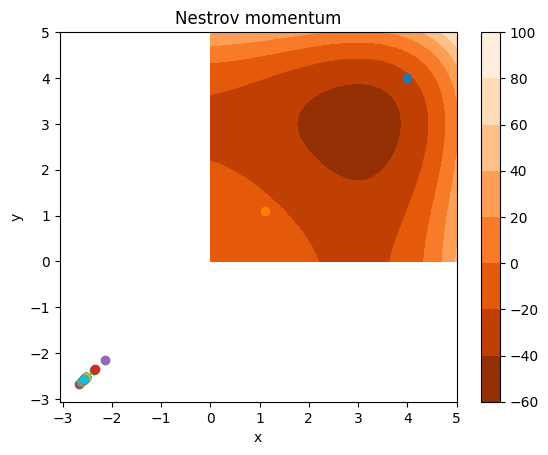

In [8]:
fig,ax=plt.subplots(1,1)
# getting the original colormap using cm.get_cmap() function
orig_map=plt.cm.get_cmap('Oranges')
# reversing the original colormap using reversed() function
reversed_map = orig_map.reversed()
cp = ax.contourf(X, Y, Z, cmap=reversed_map)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Nestrov momentum')
ax.set_xlabel('x')
ax.set_ylabel('y')

flag = False
model = Model("Nestrov momentum", init[0], init[1], lr, np.array([3, 3]))
print("Initial conditions: x={}, y={}\nLearning rate = {}".format(init[0], init[1], lr))
pl.scatter(model.x,model.y)
display.display(pl.gcf())
display.clear_output(wait=True)
time.sleep(0.1)

for epoch in range(1,50):
    model.forward()

    if model.loss() == -1:
        print("Loss is too large, gradient diverges\n")
        flag = True
        break
    elif model.loss() < 300:
        #pl.clf()
        pl.scatter(model.x,model.y)
        display.display(pl.gcf())
        display.clear_output(wait=True)
        time.sleep(0.1)
if not flag:
    print("Loss: {}".format(model.loss()))
    print("Final result: x={}, y={}\n".format(model.x, model.y))

Loss: 0.032640924974172994
Final result: x=3.1806679965410947, y=3.1806679965410947



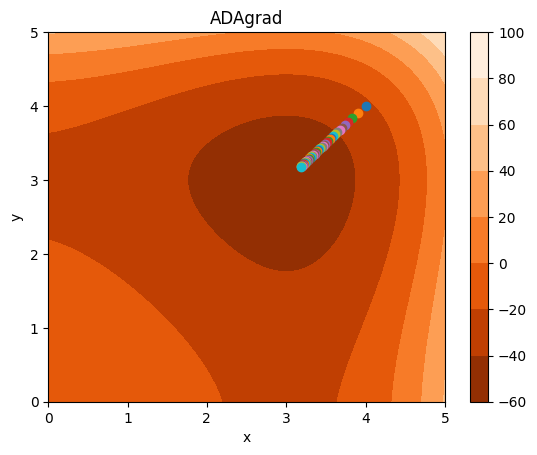

In [9]:
fig,ax=plt.subplots(1,1)
# getting the original colormap using cm.get_cmap() function
orig_map=plt.cm.get_cmap('Oranges')
# reversing the original colormap using reversed() function
reversed_map = orig_map.reversed()
cp = ax.contourf(X, Y, Z, cmap=reversed_map)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('ADAgrad')
ax.set_xlabel('x')
ax.set_ylabel('y')

flag = False
model = Model("ADAgrad", init[0], init[1], lr, np.array([3, 3]))
print("Initial conditions: x={}, y={}\nLearning rate = {}".format(init[0], init[1], lr))
pl.scatter(model.x,model.y)
display.display(pl.gcf())
display.clear_output(wait=True)
time.sleep(0.1)

for epoch in range(1,50):
    model.forward()

    if model.loss() == -1:
        print("Loss is too large, gradient diverges\n")
        flag = True
        break
    elif model.loss() < 300:
        #pl.clf()
        pl.scatter(model.x,model.y)
        display.display(pl.gcf())
        display.clear_output(wait=True)
        time.sleep(0.1)
if not flag:
    print("Loss: {}".format(model.loss()))
    print("Final result: x={}, y={}\n".format(model.x, model.y))

Loss: 0.0
Final result: x=3.0, y=3.0



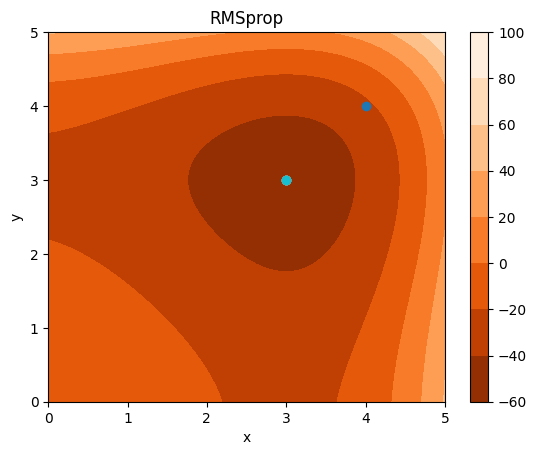

In [10]:
fig,ax=plt.subplots(1,1)
# getting the original colormap using cm.get_cmap() function
orig_map=plt.cm.get_cmap('Oranges')
# reversing the original colormap using reversed() function
reversed_map = orig_map.reversed()
cp = ax.contourf(X, Y, Z, cmap=reversed_map)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('RMSprop')
ax.set_xlabel('x')
ax.set_ylabel('y')

flag = False
model = Model("RMSprop", init[0], init[1], lr, np.array([3, 3]))
print("Initial conditions: x={}, y={}\nLearning rate = {}".format(init[0], init[1], lr))
pl.scatter(model.x,model.y)
display.display(pl.gcf())
display.clear_output(wait=True)
time.sleep(0.1)

for epoch in range(1,50):
    model.forward()

    if model.loss() == -1:
        print("Loss is too large, gradient diverges\n")
        flag = True
        break
    elif model.loss() < 300:
        #pl.clf()
        pl.scatter(model.x,model.y)
        display.display(pl.gcf())
        display.clear_output(wait=True)
        time.sleep(0.1)
if not flag:
    print("Loss: {}".format(model.loss()))
    print("Final result: x={}, y={}\n".format(model.x, model.y))

Loss: 0.0045382585115745725
Final result: x=3.0673665978922386, y=3.0673665978922386



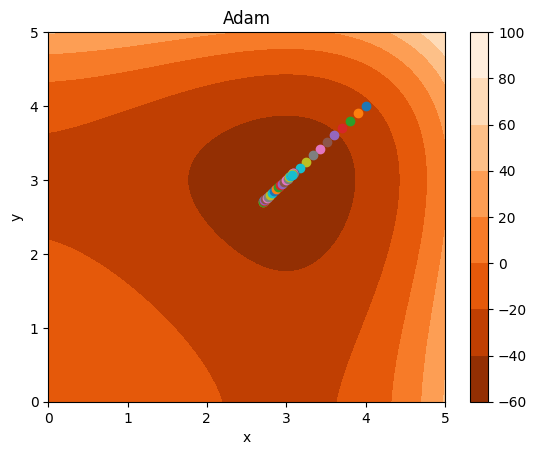

In [11]:
fig,ax=plt.subplots(1,1)
# getting the original colormap using cm.get_cmap() function
orig_map=plt.cm.get_cmap('Oranges')
# reversing the original colormap using reversed() function
reversed_map = orig_map.reversed()
cp = ax.contourf(X, Y, Z, cmap=reversed_map)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Adam')
ax.set_xlabel('x')
ax.set_ylabel('y')

flag = False
model = Model("Adam", init[0], init[1], lr, np.array([3, 3]))
print("Initial conditions: x={}, y={}\nLearning rate = {}".format(init[0], init[1], lr))
pl.scatter(model.x,model.y)
display.display(pl.gcf())
display.clear_output(wait=True)
time.sleep(0.1)

for epoch in range(1,50):
    model.forward()

    if model.loss() == -1:
        print("Loss is too large, gradient diverges\n")
        flag = True
        break
    elif model.loss() < 300:
        #pl.clf()
        pl.scatter(model.x,model.y)
        display.display(pl.gcf())
        display.clear_output(wait=True)
        time.sleep(0.1)
if not flag:
    print("Loss: {}".format(model.loss()))
    print("Final result: x={}, y={}\n".format(model.x, model.y))